# 📊 Projeto de Análise Exploratória de Dados (EDA)

## Introdução

Este projeto tem como objetivo realizar uma **Análise Exploratória de Dados (EDA)** utilizando informações de diferentes fontes relacionadas a canais de vendas e motoristas de entrega.  
A análise busca compreender melhor a estrutura dos dados, identificar padrões e gerar insights iniciais que possam apoiar decisões estratégicas.

## Objetivos do Projeto
- Explorar os dados disponíveis nos arquivos `channels.csv` e `drivers.csv`.
- Identificar a distribuição dos canais de vendas entre **OWN CHANNEL** e **MARKETPLACE**.
- Analisar o perfil dos motoristas, considerando **modal** (MOTOBOY ou BIKER) e **tipo de vínculo** (FREELANCE ou LOGISTIC OPERATOR).
- Realizar cruzamentos entre variáveis para entender possíveis relações.
- Preparar o ambiente para futuras análises mais completas, quando os arquivos maiores (`deliveries.csv`, `payments.csv`, `stores.csv`) puderem ser processados.

## Contexto
- **Channels**: representam os diferentes pontos de contato ou plataformas de vendas, classificados como canais próprios ou marketplaces.
- **Drivers**: representam os entregadores, com diferentes modais de transporte e tipos de vínculo contratual.

## Importância
A análise exploratória é uma etapa fundamental em projetos de ciência de dados, pois:
- Permite conhecer a qualidade e consistência dos dados.
- Facilita a identificação de tendências e padrões.
- Apoia a formulação de hipóteses para análises mais avançadas.
- Serve como base para modelos preditivos ou relatórios gerenciais.

---

Este notebook é, portanto, um **primeiro passo** para estruturar o entendimento dos dados disponíveis e abrir caminho para análises mais profundas envolvendo entregas, pagamentos e lojas.


Os dados foram extraídos do seguinte dataset https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center

1. Informações e configurações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import sys
print("Python:", sys.version)
print("pandas:", pd.__version__, "numpy:", np.__version__)
sns.set(style="whitegrid")


Python: 3.14.1 (tags/v3.14.1:57e0d17, Dec  2 2025, 14:05:07) [MSC v.1944 64 bit (AMD64)]
pandas: 2.3.3 numpy: 2.3.5


2. Funções utilitárias

In [2]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == 'object':
            df[col] = df[col].astype('category')
        elif str(col_type).startswith('int') or str(col_type).startswith('float'):
            df[col] = pd.to_numeric(df[col], downcast='unsigned' if 'int' in str(col_type) else 'float')
    end_mem = df.memory_usage().sum() / 1024**2
    print(f"Memória reduzida de {start_mem:.2f}MB para {end_mem:.2f}MB")
    return df

def detect_and_parse_dates(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                parsed = pd.to_datetime(df[col], errors='coerce')
                if parsed.notna().sum() / len(df) > 0.5:
                    df[col] = parsed
            except:
                pass
    return df

def aggregate_csv_by_chunks(path, groupby_cols, agg_dict, chunksize=100000, out_csv=None):
    agg_list = []
    for chunk in pd.read_csv(path, chunksize=chunksize):
        chunk = reduce_mem_usage(chunk)
        agg = chunk.groupby(groupby_cols).agg(agg_dict)
        agg_list.append(agg)
    result = pd.concat(agg_list).groupby(level=0).sum()
    if out_csv:
        result.to_csv(out_csv)
    return result


3. Carregamento e Inspeção

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_id    4 non-null      object
 1   channel_name  3 non-null      object
 2   channel_type  3 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes
Memória reduzida de 0.00MB para 0.00MB


<Axes: xlabel='count', ylabel='channel_type'>

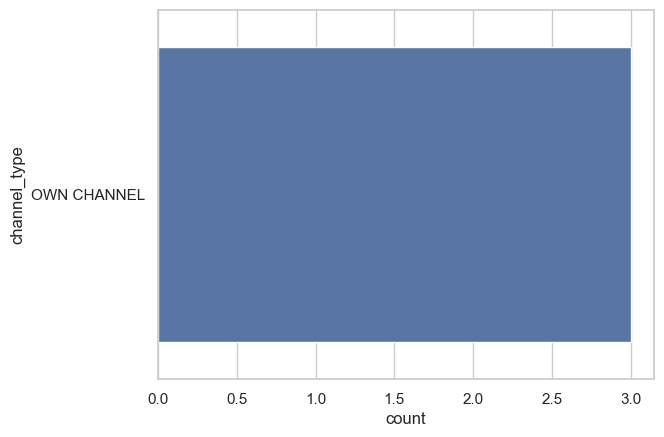

In [3]:
channels_csv = """channel_id,channel_name,channel_type
1,OTHER PLACE,OWN CHANNEL
2,PHONE PLACE,OWN CHANNEL
... (copiar todo o bloco fornecido) ...
49,RIBA PLACE,OWN CHANNEL
"""
channels = pd.read_csv(StringIO(channels_csv))
channels.info(); channels.head()
channels = reduce_mem_usage(channels)
sns.countplot(y='channel_type', data=channels)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4 non-null      object
 1   driver_modal  3 non-null      object
 2   driver_type   3 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


<Axes: xlabel='count', ylabel='driver_modal'>

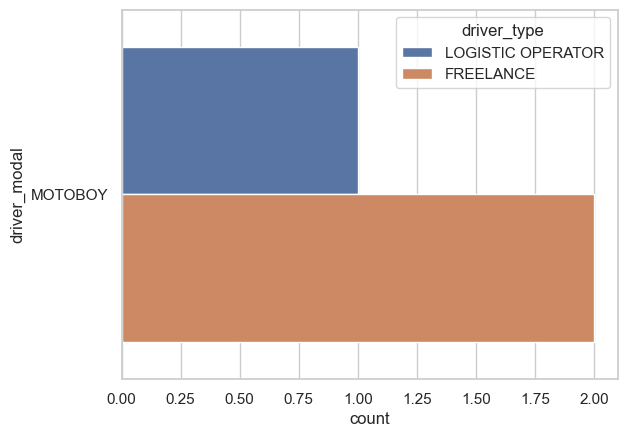

In [4]:
drivers_csv = """driver_id,driver_modal,driver_type
133,MOTOBOY,LOGISTIC OPERATOR
138,MOTOBOY,FREELANCE
... (copiar amostra) ...
5048,MOTOBOY,FREELANCE
"""
drivers = pd.read_csv(StringIO(drivers_csv))
drivers.info(); drivers['driver_modal'].value_counts()
sns.countplot(y='driver_modal', hue='driver_type', data=drivers)


In [5]:
# Exemplo: agregar número de entregas por channel_id
# deliveries_by_channel = aggregate_csv_by_chunks('deliveries.csv', ['channel_id'], {'delivery_id':'count'}, chunksize=100000, out_csv='deliveries_by_channel.csv')
# payments_by_channel = aggregate_csv_by_chunks('payments.csv', ['channel_id'], {'amount':'sum','amount':'mean'}, chunksize=100000, out_csv='payments_by_channel.csv')


In [6]:
# merged = channels.merge(deliveries_by_channel, left_on='channel_id', right_index=True, how='left')
# merged.head()
